In [1]:
import random,numpy as np
from functools import reduce

In [70]:
random.seed(7086)

In [71]:
fit_func=lambda x,y:100*(x**2-y)**2+(1-x)**2

In [72]:
def FP(population, ret):
    total = sum([t[2] for t in population])
    proportion = list(map(lambda t: t[2] / total , population))
    cumsum_list = np.cumsum(proportion)
    cumsum_dict = {i: e for i, e in enumerate(cumsum_list)}
    retList = []
    while ret > 0:
        m = random.uniform(0, 1)
        n = list(filter(lambda t: t[1] >= m, cumsum_dict.items()))
        n = n[0]
        #get element by processed index and saved it in final to be return list
        retList.append(population[n[0]])  
        ret -= 1

    return retList

In [76]:
def RB(population, ret):
    population = sorted(population, key=lambda t: t[2])
    total = sum(range(len(population))) + len(population)
    #for ranking,divided it by its index
    rank_proportion = [(i + 1) / total for i, e in enumerate(population)]
    cumsum_list = np.cumsum(rank_proportion)
    cumsum_dict = {i: e for i, e in enumerate(cumsum_list)}
    retList = []
    while ret > 0:
        m = random.uniform(0, 1)
        n = list(filter(lambda t: t[1] >= m, cumsum_dict.items()))
        #get element by processed index and saved it in final to be return list
        #n[0] only get first because we must get many validated for range
        n=n[0]
        retList.append(population[n[0]]) #pass first index means index value from tuple
        ret -= 1

    return retList

In [101]:
def BT(population, ret):
    random_list = []
    retList = []
    #     r = random.randint(0, len(population))
    #     random_list.append(r)
    while ret > 0:
        r=0
        while 1:
            r = random.sample(range(len(population)), 2)
            if r[0] and r[1] not in random_list:
                r = r[0] if population[r[0]][2] > population[r[1]][2] else r[1]
                break
                
        random_list.append(r)
        retList.append(population[r])
        ret -= 1

    return retList

In [74]:
G=50;n=25;m=20;mutation=0.25;mutation_prob=75

In [ ]:
#init population
nList=[];GList=[];data=[]
for i in range(n):
    x=round(random.uniform(-2,2),2)
    y=round(random.uniform(-1,3),2)
    fit_val=round(fit_func(x,y),2)
    nList.append([x,y,fit_val])
    
# %debug
# import ipdb
for i in range(G):
    mList=[]
    
    for j in range(int(m/2)):
        #randomly parent selection(not same)
        #t=temp
        
        #random
#         t=random.sample(range(n),2)
        
#         p1=nList[t[0]]
#         p2=nList[t[1]]
        
        #fittness proportion
        
#         t=FP(nList,2)
#         p1=t[0]
#         p2=t[1]

        #RB
#         t=RB(nList,2)
#         p1=t[0]
#         p2=t[1]

        #BT
        t=BT(nList,2)
        p1=t[0]
        p2=t[1]
        
        #crossover
        ch1=[p1[0],p2[1]]
        ch2=[p2[0],p1[1]]
        tempChs=[ch1,ch2]
        
        #mutation work
        for k in tempChs:
            if random.randint(0,100)<=mutation_prob:
                #mutate in x
#                 ipdb.set_trace()
                if random.randint(1,2)%2==0:
                    if random.randint(1,2)%2==0:
                        k[0]+=mutation
                        k[0] = 2 if k[0] > 2 else k[0]
                    else:
                        k[0]-=mutation
                        k[0] = -2 if k[0] < -2 else k[0]
                        
                    k[0]=round(k[0],2)
                    
                #mutate in y
                else:
                    if random.randint(1,2)%2==0:
                        k[1]+=mutation
                        k[1] = 3 if k[1] > 3 else k[1]
                    else:
                        k[1]-=mutation
                        k[1] = -1 if k[1] < -1 else k[1]
                        
                    k[1]=round(k[1],2)
        
        ch1+= [ round( fit_func( ch1[0] , ch1[1] ) ,2 ) ]
        ch2+= [ round( fit_func( ch2[0] , ch2[1] ) ,2 ) ]
        mList.append(ch1)
        mList.append(ch2)
    
    
    #combine both mList and nList and sort it with respect fit func value,also ovverides the nList,so we used in next iteration
    
    #truncation method
#     nList=sorted(nList+mList,key=lambda item:item[2],reverse=True)[:25]
    
    #FP method
#     nList=FP(nList+mList,25)

    #RB method
    nList=RB(nList+mList,25)

    #BT method
#     nList=BT(nList+mList,25)
    
    data.append(nList)
    #ok now write it to text file...
#     print("Generation {}#:{}".format(i,nList))
    GList.append(nList[0][2])
        
        

In [2]:
2

2

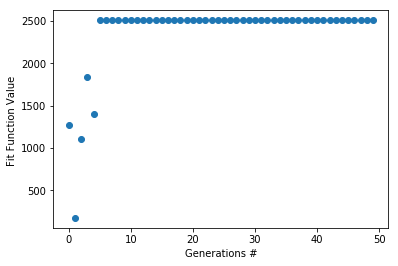

In [121]:
import matplotlib.pyplot as plt
plt.scatter(list(range(len(GList))),GList)
plt.xlabel("Generations #")
plt.ylabel("Fit Function Value ")
plt.show()

In [122]:
with open('bt_rb_data.txt','w') as f:
    i=0
    for j in GList:
        f.write("Generation {}#:{}\n".format(i,str(j)))
        i+=1